# Figures and analysis

This notebook contains scripts to reproduce the figures and analytical results of the manuscript. Full details of the plotting functions are typically contained in `figures.py`. Figures are saved in PDF format in the `figures/` folder.


# Contents
* [Libraries](#package)
* [Figures and data analysis](#figure)
    * [Figure 1. Overview and performance comparison](#overview)
    * [Figure S1. Robustness to finite sampling in simulations](#simulation)
    * [Figure 2. Comparison of inferences at single sites and epistasis](#details)
    * [Figure 3. Visualizations of MPL_DMS](#visualization)
    * [Analysis. Comparison of inferred mutant effects and natural frequencies](#natural)

## Libraries<a class = "anchor" id = "package"></a>

In [1]:
# Full library list and version numbers

print('Figures below were produced using the following packages:')

import os
import sys
print('python ==', sys.version)

import numpy as np
print('numpy ==', np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy ==', sp.__version__)

import pandas as pd
print('pandas ==', pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib ==', matplotlib.__version__)

import seaborn as sns 
print('seaborn ==', sns.__version__)

import logomaker as lm

import warnings

import figures as figs
import popDMS as pop

from importlib import reload

Figures below were produced using the following packages:
python == 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:41:52) [Clang 15.0.7 ]
numpy == 1.26.0
scipy == 1.11.2
pandas == 2.1.1
matplotlib == 3.8.0
seaborn == 0.12.2


## Figures and data analysis <a class = "anchor" id = "figure"></a>

### Figure 1. Overview and performance comparison <a class = "anchor" id = "overview"></a>

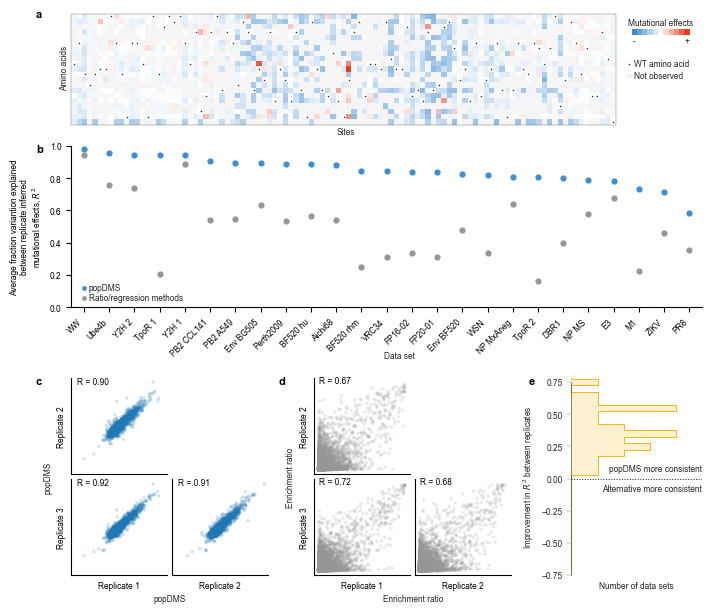

In [2]:
reload(figs)
figs.fig_methods_comparison()
plt.show()

### Figure S1. Robustness to finite sampling in simulations <a class = "anchor" id = "simulation"></a>

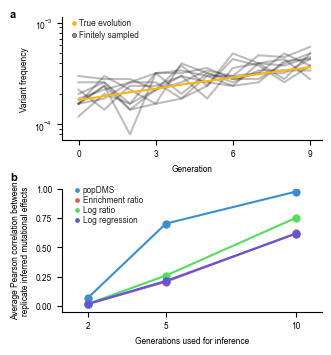

In [3]:
reload(figs)
figs.fig_finite_sampling()
plt.show()

### Figure 2. Comparison of inferences at single sites and epistasis <a class = "anchor" id = "details"></a>

In [2]:
reload(figs)
figs.FIG2_METHODS_COMPARISON()
plt.show()

TypeError: unsupported operand type(s) for +: 'float' and 'numpy.str_'

/Users/jpb156/Dropbox/git/paper-DMS-inference/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x16a443c40>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/Users/jpb156/Dropbox/git/paper-DMS-inference/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x16a40fc10>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/Users/jpb156/Dropbox/git/paper-DMS-inference/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x16a442c80>' has dtype incompatible with float64

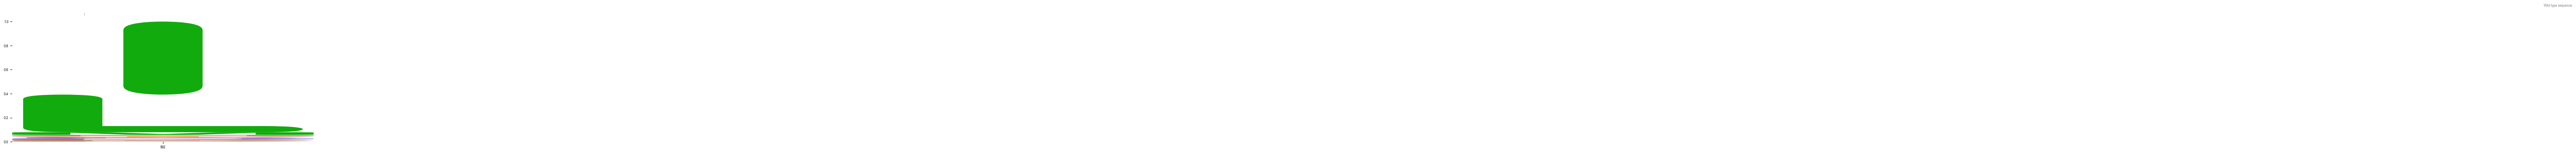

In [5]:
# logo test

raw_sequence = 'data/raw_data/BG505_Reference_sequence.txt'
sel_file  = 'output/selection_coefficients/HIV Env BG505.csv.gz'
pref_file = 'data/prefs/HIV Env BG505_avgprefs.csv'
start_site, end_site = 592, 592
sites_per_line = 30
MPL_scale  = 5
PREF_scale = 5
off_set    = 30

with open(raw_sequence, 'r') as file:
    sequence = file.read().replace('\n', '')
AA_seq = [pop.codon2aa(sequence[3*i:3*i+3]) for i in range(int(len(sequence)/3))]
AA_seq = AA_seq[start_site-off_set:end_site-off_set+1]

data = pd.read_csv(sel_file)
data = data[(data["site"]<=end_site) & (data["site"]>=start_site)]
data["site"] -= start_site-1  #logomaker plot data with index shift, need to adjust the index first, then the index showed in the logoplot will be adjusted back to reference
site_list = data['site'].unique().tolist()
rep_list  = data.columns[2:]

for rep in ['joint']:
    data1 = data[['site', 'amino_acid', rep]]
    data1 = pd.pivot_table(data1, values = rep, index = ['site'], columns = ['amino_acid']).reset_index()
    data1.set_index('site', inplace = True)
    data1 = data1.drop(['*'], axis = 1)
    total_line_num = len(data1.columns)
    num_line = int(total_line_num/sites_per_line) + 1
    for i in range(num_line):
        if i != num_line - 1:
            data_sub = data1[i*sites_per_line: (i + 1) * sites_per_line]               
        else:
            data_sub = data1[i*sites_per_line:]
        site_sub = data_sub.columns.tolist()  
        data_exp = np.exp(MPL_scale*data_sub)
        data_exp = data_exp.div(data_exp.sum(axis = 1), axis = 0)            
        data_exp = data_exp.replace(np.nan, 0)
        
        logo = lm.Logo(data_exp, 
                       figsize      = [15 * len(site_sub)/sites_per_line,4],
                       font_name    = 'Arial Rounded MT Bold',
                       color_scheme = 'dmslogo_funcgroup')
        
        logo.style_xticks(fmt = '%d', anchor = 0)
        for j in range(len(AA_seq)):
            logo.ax.text(j + 0.75, 1.05, AA_seq[j], color = 'grey')
        logo.ax.text(8.5, 1.125, 'Wild type sequence', color = 'grey') 
        logo.ax.set_xticklabels('%d'%(x-1+start_site) for x in data_exp.index.tolist())
        logo.style_spines(spines=['bottom', 'right', 'left', 'top'], visible = False)
plt.show()

### Analysis. Comparison of inferred mutant effects and natural frequencies <a class = "anchor" id = "natural"></a>

In [7]:
df_freq  = pd.read_csv('./data/raw_data/H1_HumanSwine_alignment_frequency_mod.txt', sep="\t")
df_freq  = df_freq.drop(['WT_AA'], axis=1)
df_sele  = pd.read_csv('./output/selection_coefficients/WSN.csv.gz')
df_pref1 = pd.read_csv('./data/prefs/WSN-1_prefs.txt', sep="\t")
df_pref1 = df_pref1.drop(['WT_AA', 'PI_*'], axis = 1)
df_pref2 = pd.read_csv('./data/prefs/WSN-2_prefs.txt', sep="\t")
df_pref2 = df_pref2.drop(['WT_AA', 'PI_*'], axis = 1)
df_pref3 = pd.read_csv('./data/prefs/WSN-3_prefs.txt', sep="\t")
df_pref3 = df_pref3.drop(['WT_AA', 'PI_*'], axis = 1)
df_pref  = pd.concat([df_pref1, df_pref2, df_pref3]).groupby(level=0).mean()

sites = np.array(df_freq['SITE'])
ranks_pref = []
z_pref     = []
ranks_sele = []
z_sele     = []

aas = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

for s in sites:
    if s==1:
        continue
    
    df_f_site = df_freq[df_freq['SITE']==s]
    f_site = [df_f_site[aa] for aa in aas]
    top = np.argmax(f_site)
    
    df_p_site  = df_pref[df_pref['#SITE']==s]
    pref_site  = [df_p_site['PI_%s' % aa] for aa in aas]
    site_ranks = st.rankdata(pref_site) 
    ranks_pref.append(site_ranks[top])
    
    m_site   = np.mean(pref_site)
    std_site = np.std(pref_site)
    z_pref.append((pref_site[top]-m_site)/std_site)
    
    df_s_site  = df_sele[df_sele['site']==s]
    sele_site  = [df_s_site[df_s_site['amino_acid']==aa]['joint'] for aa in aas]
    site_ranks = st.rankdata(sele_site)
    ranks_sele.append(site_ranks[top])
    
    m_site   = np.mean(sele_site)
    std_site = np.std(sele_site)
    z_sele.append((sele_site[top]-m_site)/std_site)

print('rank of WT AA (larger is better)')
print('method\tmean\tstd')
print('pref\t%.1f\t%.1f' % (np.mean(ranks_pref), np.std(ranks_pref)))
print('s\t%.1f\t%.1f\n'  % (np.mean(ranks_sele), np.std(ranks_sele)))

print('z score of WT AA (larger is better)')
print('method\tmean\tstd')
print('pref\t%.1f\t%.1f' % (np.mean(z_pref), np.std(z_pref)))
print('s\t%.1f\t%.1f\n'  % (np.mean(z_sele), np.std(z_sele)))

rank of WT AA (larger is better)
method	mean	std
pref	18.3	3.2
s	18.9	3.7

z score of WT AA (larger is better)
method	mean	std
pref	2.6	1.5
s	3.5	1.5



### Figure X. Selection coefficients vs. Preferences<a class = "anchor" id = "Sele_Pref_correlation"></a>

How about putting this in Figure2 as 2d?

In [ ]:
df_sele = pd.read_csv('./output/selection_coefficients/HIV Env BG505.csv.gz', compression = 'gzip')
df_sele = df_sele[df_sele['amino_acid']!='*']
df_sele

df_pref = pd.read_csv('./output/merged_preference/HIV BG505.csv.gz', compression = 'gzip')
df_pref

df_merged = pd.merge(df_pref[['site', 'amino_acid', 'average']], df_sele[['site', 'amino_acid', 'joint']], on=['site', 'amino_acid'])
print('Pearson correlation: ', st.pearsonr(df_merged['average'], df_merged['joint'])[0].round(2))
print('Spearman correlation: ', st.spearmanr(df_merged['average'], df_merged['joint'])[0].round(2))

df_merged.plot.scatter('average', 'joint', alpha = 0.3)
plt.xlabel('Preference')
plt.ylabel('Selection coefficient')
plt.title('HIV Env BG505 selection coefficients vs. preference')
plt.show()

### Figure XX. Selection coefficients/Preferences vs. Natural frequency<a class = "anchor" id = "Sele_pref_natual_freq"></a>

In [ ]:
df_sele = pd.read_csv('./output/selection_coefficients/WSN.csv.gz')
df_freq = pd.read_csv('./data/raw_data/H1_HumanSwine_alignment_frequencies.txt', sep="\t")
df_freq = df_freq.drop(['SITE_ENTROPY', 'WT_AA'], axis=1)
df_freq.columns = ['site']+[i[-1] for i in df_freq.columns[1:]]
df_pref = pd.read_csv('./output/merged_preference/WSN.csv.gz', compression = 'gzip')
df_pref

site_list = []
amino_acid = []
freq_list = []

for i in df_freq['site'].tolist():
    site_list += [i]*20
    amino_acid += df_freq.columns[1:].tolist()

freq_list = df_freq[df_freq.columns[1:]].values.flatten()
df_freq_merged = pd.DataFrame(columns=['site', 'amino_acid', 'frequency'])
df_freq_merged['site'] = site_list
df_freq_merged['amino_acid'] = amino_acid
df_freq_merged['frequency'] = freq_list

df_merged = pd.merge(df_sele, df_freq_merged, on = ['site', 'amino_acid'])
df_merged = pd.merge(df_merged, df_pref, on = ['site', 'amino_acid'])
df_merged = df_merged.rename(columns={'rep_1_x': 'rep_1_sele', 'rep_2_x': 'rep_2_sele', 'rep_3_x': 'rep_3_sele', 'joint': 'sele_joint',
                          'rep_1_y': 'rep_1_pref', 'rep_2_y': 'rep_2_pref', 'rep_3_y': 'rep_3_pref', 'average': 'pref_avg'})
print('Pearson correlation(selection coefficient vs. natural frequency):', st.pearsonr(df_merged['frequency'], df_merged['sele_joint'])[0])
print('Spearman correlation(selection coefficient vs. natural frequency):', st.spearmanr(df_merged['frequency'], df_merged['sele_joint'])[0])

df_merged.plot.scatter(x='frequency', y='sele_joint', alpha = 0.3)

plt.title('MPL vs. natural frequency')
plt.xlabel('natural frequency')
plt.ylabel('joint selection coefficients')
plt.show()
print('Pearson correlation(preference vs. natural frequency):', st.pearsonr(df_merged['frequency'], df_merged['pref_avg'])[0])
print('Spearman correlation(preference vs. natural frequency):', st.spearmanr(df_merged['frequency'], df_merged['pref_avg'])[0])

df_merged.plot.scatter(x='frequency', y='pref_avg', alpha = 0.3)
plt.title('Preference vs. natural frequency')
plt.xlabel('natural frequency')
plt.ylabel('aveerage preference')
plt.show()


### Figure 3. Visualizations of MPL_DMS<a class = "anchor" id = "visualization"></a>

LogomakerError: some matrix elements are not finite. Set allow_nan=True to allow this.

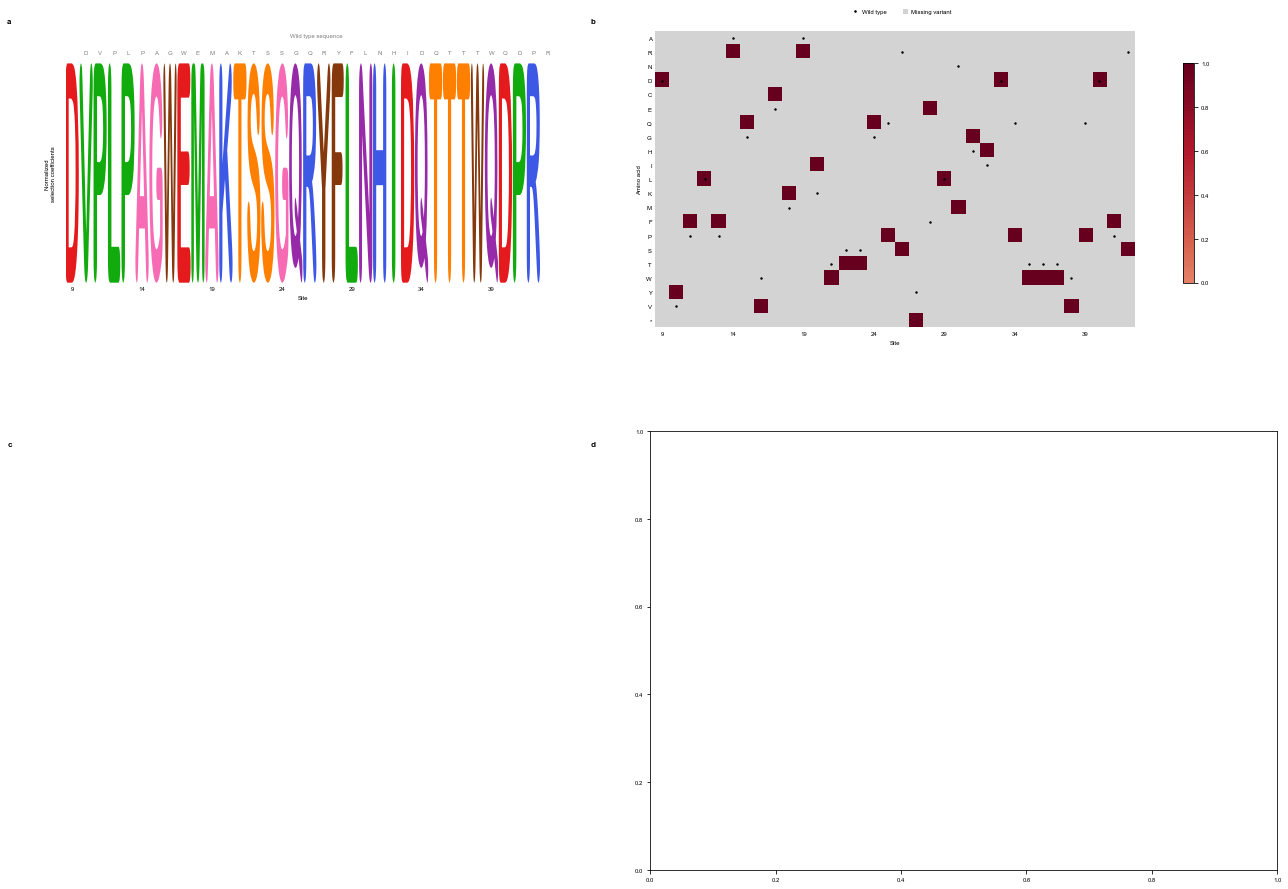

<Figure size 432x288 with 0 Axes>

In [3]:
reload(figs)
figs.FIG3_VISUALIZATION()
plt.show()

### Figure4. Visualizations of Epistasis<a class = "anchor" id = "visualization"></a>

In [ ]:
reload(figs)
figs.FIG4_VISUALIZATION()

### Supplemental figure 1. Epistasis scatter<a class = "anchor" id = "epistasis supp"></a>

In [ ]:
reload(figs)
figs.SUPPFIG1_EPISTASIS()